# Breast Cancer Wisconsin Dataset

Dataset source: https://www.kaggle.com/datasets/rahmasleam/breast-cancer?select=breast-cancer.csv

Breast cancer is the most prevalent cancer among women globally, accounting for 25% of all cancer cases. In 2015 alone, it impacted over 2.1 million individuals. The disease begins when cells in the breast grow uncontrollably, forming tumors that can be detected via X-ray or felt as lumps.

The primary challenge in its detection is classifying tumors as malignant (cancerous) or benign (non-cancerous). The goal is then to analyze and classify these tumors using Machine Learning techniques, predicting whether a tumor is malignant or benign based on some measured features (i.e. radius_mean, texture_mean, perimeter_mean	etc.):

- Understand and clean the dataset.
- Build classification models to predict if the cancer is malignant or benign.
- Fine-tune hyperparameters and compare the performance of various classification algorithms.
- Evaluate the results of the predictions.

# Data exploration and processing

Import libraries

In [183]:
import pandas as pd

Load the data

In [184]:
data = pd.read_csv('3_final_project-breast_cancer_dataset.csv', sep=',')

In [185]:
data.shape

(569, 32)

There are 569 rows and 32 columns

In [186]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Features description \

The first 11 features (mean) represent average measurements of the tumor's geometric and surface properties, while the next 10 features (se) represent the standard deviation of these measurements. The last 10 features (worst) represent the worst (highest) values for each of these measures, used to detect any obvious abnormalities. \

- id: Unique identifier for each sample (not a useful feature for classification).
- diagnosis: Classification of the tumor (M = malignant, B = benign).
- radius_mean: Mean radius of the tumor, a measure of the size (average).
- texture_mean: Mean texture of the tumor's surface (variation in pixel - intensity within the tumor region).
- perimeter_mean: Mean perimeter of the tumor.
- area_mean: Mean area of the tumor.
- smoothness_mean: Mean smoothness of the tumor’s surface (how much it deviates from being spherical).
- compactness_mean: Mean compactness of the tumor (how compact the shape is, related to the ratio of perimeter to area).
- concavity_mean: Mean concavity of the tumor’s surface (areas with inward curvature).
- concave points_mean: Mean number of concave points on the tumor's surface (points where the surface is inward).
- symmetry_mean: Mean symmetry of the tumor's surface (how symmetrical the shape is).
- fractal_dimension_mean: Mean fractal dimension of the tumor’s surface (measure of geometric complexity).
- radius_se: Standard deviation of the radius, measuring variability in the radius.
- texture_se: Standard deviation of the tumor’s texture.
- perimeter_se: Standard deviation of the perimeter of the tumor.
- area_se: Standard deviation of the area of the tumor.
- smoothness_se: Standard deviation of the smoothness of the tumor’s surface.
- compactness_se: Standard deviation of the compactness of the tumor.
- concavity_se: Standard deviation of the concavity of the tumor’s surface.
- concave points_se: Standard deviation of the concave points on the tumor’s surface.
- symmetry_se: Standard deviation of the symmetry of the tumor’s surface.
- fractal_dimension_se: Standard deviation of the fractal dimension of the tumor’s surface.
- radius_worst: Worst value for the radius (the highest value across all samples).
- texture_worst: Worst value for the texture (the highest value across all samples).
- perimeter_worst: Worst value for the perimeter of the tumor.
- area_worst: Worst value for the area of the tumor.
- smoothness_worst: Worst value for the smoothness of the tumor’s surface.
- compactness_worst: Worst value for the compactness of the tumor.
- concavity_worst: Worst value for the concavity of the tumor’s surface.
- concave points_worst: Worst value for the concave points on the tumor’s surface.
- symmetry_worst: Worst value for the symmetry of the tumor’s surface.
- fractal_dimension_worst: Worst value for the fractal dimension of the tumor’s surface.

The dataset has all complete values. Moreover, all the features are float numbers, exept for the ID (integer) and the diagnosis that is an object.

In [188]:
# unique values fo diagnosis
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

It is useful to check the correlations between features and the outcome (diagnosis) in  order to:
- avoid the multicollinearity for linear models (LR)
- understand the relations between features and outcome and consider removing some features to reduce dimensionality and improve generalisation.

First, it is necessary to encode the labels M (Malignant) with 1 and B (Benign) with 0

In [189]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis'].head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [190]:
# Calculate the correlation between features and the outcome
correlation_matrix = data.corr()
print(round(correlation_matrix['diagnosis'].sort_values(ascending=False), 2))

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
area_worst                 0.73
radius_mean                0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

There are some features that are highly correlated (>0.7), but it is not easy to understand whether, for example, 'concave points_worst' and 'perimeter_worst' affect the prediction of a malignant tumour. So let's keep all the features for now.

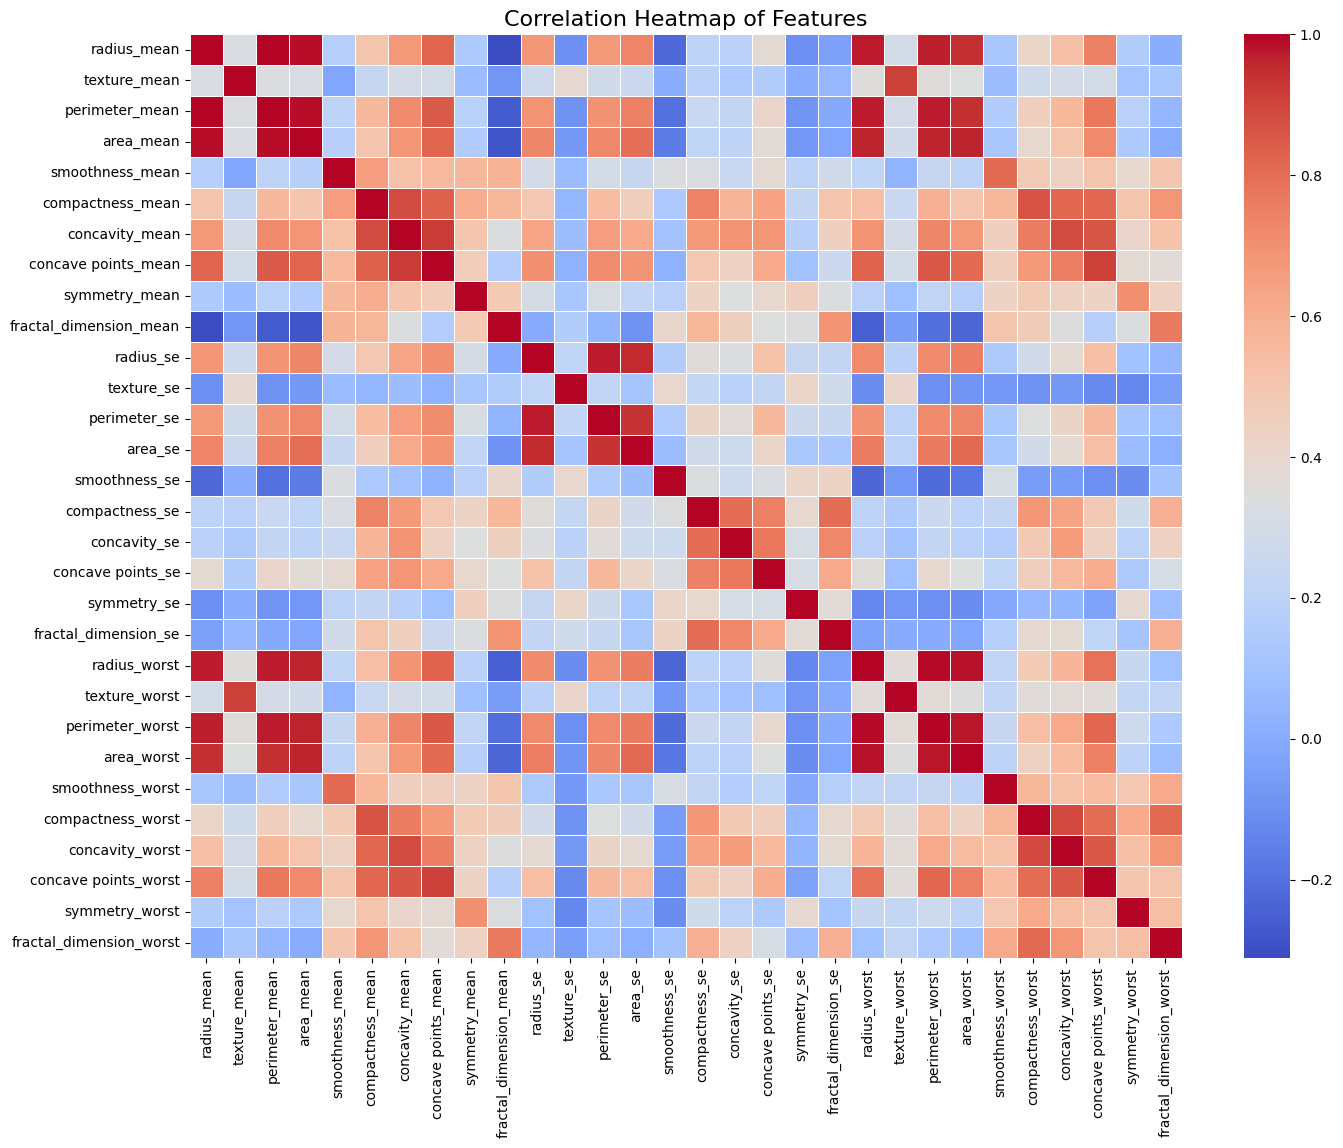

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix without id and diagnosis
correlation_matrix_2 = data.drop(['id', 'diagnosis'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_2, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

The heatmap reveals strong correlations among features like radius_mean, perimeter_mean, and area_mean, indicating larger tumors tend to have proportional measurements. Clusters suggest redundancy, suitable for dimensionality reduction.

Separate the features X from the outcome y

In [192]:
X = data.drop(['diagnosis', 'id'], axis=1)

In [193]:
y = data['diagnosis']
y.value_counts(normalize=True)

,proportion
diagnosis,
0,0.627417
1,0.372583


The outcome has a unbalanced distribution: 62% for 0 and 37% for 1. It will be a good idea to split the train and test usign StratifiedShuffleSplit or train_test_split with the stratify parameter. This ensures:
- avoid biases in the model (unbalanced between training and test set)
- fairer representation of data: The shuffle ensures that both the training set and the test set contain a representative distribution of examples of both tumour types (benign and malignant), reducing the risk of overfitting or underfitting.

Some statistic on feature X

In [194]:
round(X.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


The values have different scales. It is then necessary to scale them so that the machine learning algorithm can work better.
The best choices are:
- Logistic Regression (LR): StandardScaler, because Logistic regression is based on an optimisation that works best with normalised data (mean 0, standard deviation 1).
- K-Nearest Neighbors (KNN): MinMaxScaler, because since KNN model calculates distances between points, data with different scales would affect the distances in an unbalanced way, making some features predominant. MinMaxScaler ensures that all features are in the same range, e.g. [0,1].
- Support Vector Machine (SVM): StandardScaler, because SVMs calculate optimal margins and hyperplanes that are sensitive to feature scales.
StandardScaler is the best choice because centred distributions help the algorithm converge more easily.
- Decision Trees (DT), Random Forests (RF), Extra Trees (ET) and XGBoost (XG): None specific required. These algorithms are not sensitive to feature scaling. They do not require scaling, as they rely on split thresholds in the raw features.


MinMaxScaler for KNN

In [195]:
from sklearn.preprocessing import MinMaxScaler

scaler_mms = MinMaxScaler()
X_mms = scaler_mms.fit_transform(X)
print('Range:', X_mms.min(), round(X_mms.max(), 2))

Range: 0.0 1.0


StandardScaler for LR and SVM

In [196]:
from sklearn.preprocessing import StandardScaler

scaler_sc = StandardScaler()
X_ss = scaler_sc.fit_transform(X)
print('Range:', X_ss.min(), round(X_ss.max(), 2))

Range: -3.112084787919981 12.07


Visualize again the statistics

In [197]:
# with MinMaxScaler
X_mms = pd.DataFrame(X_mms)
round(X_mms.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
0,569.0,0.34,0.17,0.0,0.22,0.30,0.42,1.0
1,569.0,0.32,0.15,0.0,0.22,0.31,0.41,1.0
2,569.0,0.33,0.17,0.0,0.22,0.29,0.42,1.0
3,569.0,0.22,0.15,0.0,0.12,0.17,0.27,1.0
4,569.0,0.39,0.13,0.0,0.30,0.39,0.48,1.0
5,569.0,0.26,0.16,0.0,0.14,0.22,0.34,1.0
6,569.0,0.21,0.19,0.0,0.07,0.14,0.31,1.0
7,569.0,0.24,0.19,0.0,0.10,0.17,0.37,1.0
8,569.0,0.38,0.14,0.0,0.28,0.37,0.45,1.0
9,569.0,0.27,0.15,0.0,0.16,0.24,0.34,1.0


In [198]:
# with StandardScaler
X_ss = pd.DataFrame(X_ss)
round(X_ss.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-0.0,1.0,-2.03,-0.69,-0.22,0.47,3.97
1,569.0,0.0,1.0,-2.23,-0.73,-0.10,0.58,4.65
2,569.0,-0.0,1.0,-1.98,-0.69,-0.24,0.50,3.98
3,569.0,-0.0,1.0,-1.45,-0.67,-0.30,0.36,5.25
4,569.0,-0.0,1.0,-3.11,-0.71,-0.03,0.64,4.77
5,569.0,0.0,1.0,-1.61,-0.75,-0.22,0.49,4.57
6,569.0,0.0,1.0,-1.11,-0.74,-0.34,0.53,4.24
7,569.0,-0.0,1.0,-1.26,-0.74,-0.40,0.65,3.93
8,569.0,0.0,1.0,-2.74,-0.70,-0.07,0.53,4.48
9,569.0,0.0,1.0,-1.82,-0.72,-0.18,0.47,4.91


In [199]:
from sklearn.model_selection import train_test_split

# for MinMaxScaler
X_train_mms, X_test_mms, y_train, y_test = train_test_split(X_mms, y, test_size=0.3, stratify=y, random_state=42)
print("X_train_mms shape:", X_train_mms.shape)
print("X_test_mms shape:", X_test_mms.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_mms shape: (398, 30)
X_test_mms shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [200]:
# for StandardScaler
X_train_ss, X_test_ss, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, stratify=y, random_state=42)
print("X_train_ss shape:", X_train_ss.shape)
print("X_test_ss shape:", X_test_ss.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_ss shape: (398, 30)
X_test_ss shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [201]:
# for models that don't require scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("X_train_ss shape:", X_train.shape)
print("X_test_ss shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_ss shape: (398, 30)
X_test_ss shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


# Logistic Regression model

In [202]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time

# Model file name
model_filename = "logistic_regression_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_lr = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid
    param_grid_lr = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],  # Regularization type
        'solver': ['liblinear', 'saga']  # Solver algorithm
    }

    # Create the Logistic Regression model
    logreg = LogisticRegression(max_iter=10000)

    # Create GridSearchCV object
    grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='f1')  # f1 score is better for tumor classification

    # Fit the model using X_train_ss and y_train
    grid_search_lr.fit(X_train_ss, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_lr, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_lr = end_time - start_time
    print(f"Cell execution time: {execution_time_lr:.2f} seconds.")

# Print the best parameters and the best score
print("Best parameters:", grid_search_lr.best_params_)
print("Best cross-validation score:", grid_search_lr.best_score_)

# Evaluate the model on the test set
y_pred_lr = grid_search_lr.predict(X_test_ss)

# Accuracy
test_accuracy_lr = grid_search_lr.score(X_test_ss, y_test)
print("Test set accuracy:", test_accuracy_lr)

# Additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Model loaded.
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9644830060084297
Test set accuracy: 0.9682539682539683

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix:
 [[106   1]
 [  3  61]]


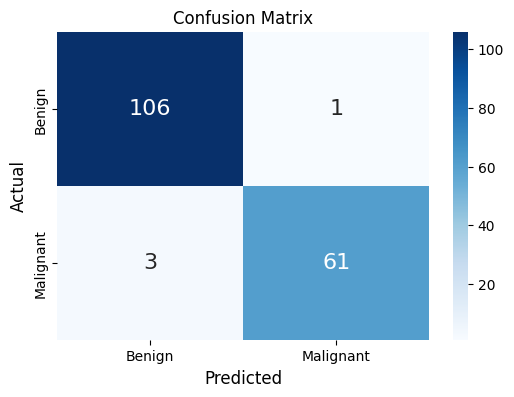

In [203]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix')
plt.show()

In this case, where it is important to prevent malignant tumours from being misclassified as benign (i.e. reduce false negatives), the most important metric is the recall for class 1 (representing malignant tumours). \
Class 0: benign \
Class 1: malignant \
The LR model classified 3 instances as bening, while they are malign.

# KNN model

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# Model file name
model_filename = "knn_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_knn = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid for KNN
    param_grid_knn = {
        'n_neighbors': range(1, 51, 2),  # Odd number of neighbors
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    # Create the KNN model
    knn = KNeighborsClassifier()

    # Create GridSearchCV object for KNN
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')  # f1 score is better for tumor classification

    # Fit the KNN model using X_train_mms and y_train
    grid_search_knn.fit(X_train_mms, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_knn, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_knn = end_time - start_time
    print(f"Cell execution time: {execution_time_knn:.2f} seconds.")

# Print the best parameters and the best score for KNN
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation score for KNN:", grid_search_knn.best_score_)

# Evaluate the KNN model on the test set
y_pred_knn = grid_search_knn.predict(X_test_mms)

# Accuracy for KNN
test_accuracy_knn = grid_search_knn.score(X_test_mms, y_test)
print("Test set accuracy for KNN:", test_accuracy_knn)

# Additional evaluation metrics for KNN
print("\nClassification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))

Model loaded.
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.967608286252354
Test set accuracy for KNN: 0.967741935483871

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix for KNN:
 [[107   0]
 [  4  60]]


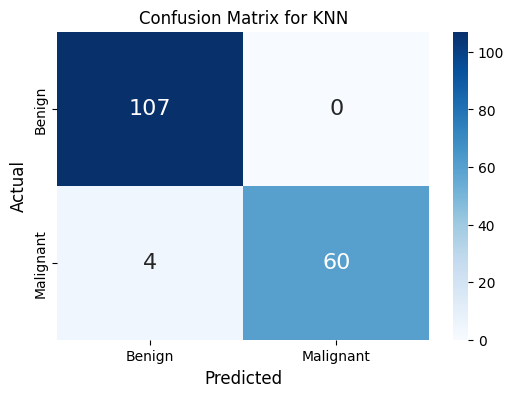

In [205]:
#Confusion Matrix visualization for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for KNN')
plt.show()

The performance is worse for KNN with respect to LR, because there are 4 malignant tumor classified as bening. The recall for class 1 is 0.94 wich is lower that 0.95 of LR

# SVM model

In [206]:
from sklearn.svm import SVC

# Model file name
model_filename = "svm_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_svm = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid for SVM
    param_grid_svm = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }

    # Create the SVM model
    svm = SVC(class_weight='balanced', probability=True)  # Optional: balance class weights if data is imbalanced

    # Create GridSearchCV object for SVM
    grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1')  # f1 score is better for tumor classification

    # Fit the SVM model using X_train_ss and y_train
    grid_search_svm.fit(X_train_ss, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_svm, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_svm = end_time - start_time
    print(f"Cell execution time: {execution_time_svm:.2f} seconds.")

# Print the best parameters and the best score for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

# Evaluate the SVM model on the test set
y_pred_svm = grid_search_svm.predict(X_test_ss)

# Accuracy for SVM
test_accuracy_svm = grid_search_svm.score(X_test_ss, y_test)
print("Test set accuracy for SVM:", test_accuracy_svm)

# Additional evaluation metrics for SVM
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

Model loaded.
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.9575123599057523
Test set accuracy for SVM: 0.976

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Confusion Matrix for SVM:
 [[107   0]
 [  3  61]]


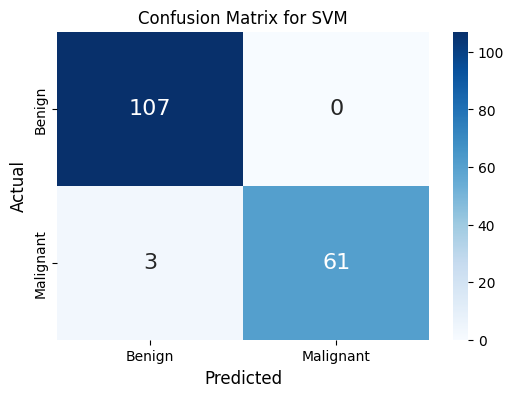

In [207]:
# Confusion Matrix visualization for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for SVM')
plt.show()

The overall performance of SVM is better than LR and KNN. However, the recall on class 1 is the same as for LR (0.95).

# Decision Tree model

In [208]:
from sklearn.tree import DecisionTreeClassifier

# Model file name
model_filename = "decision_tree_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_dt = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid for Decision Tree
    param_grid_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 21),
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': [None, 'balanced']
    }

    # Create the Decision Tree model
    dt = DecisionTreeClassifier(random_state=42)

    # Create GridSearchCV object for Decision Tree
    grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

    # Fit the Decision Tree model (scaled or unscaled data)
    grid_search_dt.fit(X_train_ss, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_dt, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_dt = end_time - start_time
    print(f"Cell execution time: {execution_time_dt:.2f} seconds.")

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the Decision Tree model on the test set
y_pred_dt = grid_search_dt.predict(X_test_ss)

# Accuracy for Decision Tree
test_accuracy_dt = grid_search_dt.score(X_test_ss, y_test)
print("Test set accuracy for Decision Tree:", test_accuracy_dt)

# Additional evaluation metrics for Decision Tree
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))

Model loaded.
Best parameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1}
Best cross-validation score for Decision Tree: 0.9179988660559235
Test set accuracy for Decision Tree: 0.8925619834710744

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       107
           1       0.95      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171


Confusion Matrix for Decision Tree:
 [[104   3]
 [ 10  54]]


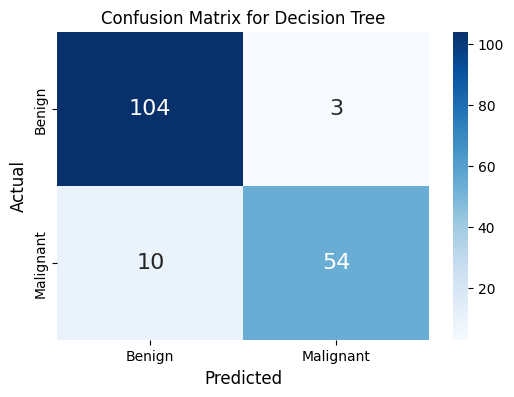

In [209]:
# Confusion Matrix visualization for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

DT has very bad performance on class 1 recall (0.84) for this kind of task. There are 10 tumors malignant classified as bening.

# Random Forest model

In [210]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# model file name
model_filename = "random_forest_model.pkl"

# check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_rf = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # start time
    start_time = time.time()

    # parameter grid for Random Forest
    param_grid_rf = {
        'n_estimators': [50, 100],  # Number of trees in the forest
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 21),
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced'],
        'bootstrap': [True]
    }

    # Create the Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # Create GridSearchCV object for Random Forest
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

    # Fit the Random Forest model (scaled or unscaled data)
    grid_search_rf.fit(X_train_ss, y_train)

    # save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_rf, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_rf = end_time - start_time
    print(f"Cell execution time: {execution_time_rf:.2f} seconds.")

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Evaluate the model on the test set
y_pred_rf = grid_search_rf.predict(X_test_ss)

# Accuracy
test_accuracy_rf = grid_search_rf.score(X_test_ss, y_test)
print("Test set accuracy for Random Forest:", test_accuracy_rf)

# Additional evaluation metrics
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Model loaded.
Best parameters for Random Forest: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9545398974462603
Test set accuracy for Random Forest: 0.9421487603305785

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Confusion Matrix for Random Forest:
 [[107   0]
 [  7  57]]


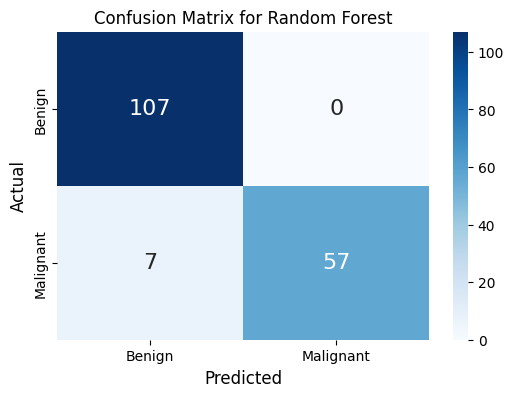

In [211]:
# Confusion Matrix visualization for Decision Tree
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for Random Forest')
plt.show()

The performance of RF is not good for the class 1 recall, with 7 malignant tumor classified as benign.

# Extra Trees model

In [212]:
from sklearn.ensemble import ExtraTreesClassifier

# Model file name
model_filename = "extra_trees_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_et = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid for Extra Trees
    param_grid_et = {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    # Create the Extra Trees model
    et = ExtraTreesClassifier(random_state=42)

    # Create GridSearchCV object for Extra Trees
    grid_search_et = GridSearchCV(et, param_grid_et, cv=5, scoring='f1', n_jobs=-1)

    # Fit the Extra Trees model
    grid_search_et.fit(X_train, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_et, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_et = end_time - start_time
    print(f"Cell execution time: {execution_time_et:.2f} seconds.")

# Print the best parameters and best score
print(f"Best parameters for Extra Trees: {grid_search_et.best_params_}")
print(f"Best cross-validation F1 score: {grid_search_et.best_score_:.4f}")

# Evaluate the model
y_pred_et = grid_search_et.predict(X_test)
test_accuracy_et = grid_search_et.score(X_test, y_test)
print(f"Test set accuracy for Extra Trees: {test_accuracy_et:.4f}")
print("\nClassification Report for Extra Trees:\n", classification_report(y_test, y_pred_et))
print("\nConfusion Matrix for Extra Trees:\n", confusion_matrix(y_test, y_pred_et))

Model loaded.
Best parameters for Extra Trees: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation F1 score: 0.9607
Test set accuracy for Extra Trees: 0.9508

Classification Report for Extra Trees:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


Confusion Matrix for Extra Trees:
 [[107   0]
 [  6  58]]


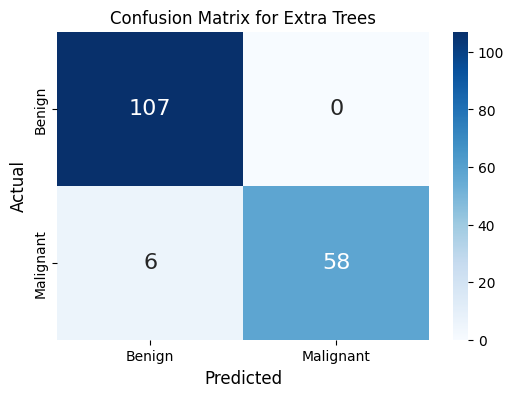

In [213]:
# Confusion Matrix visualization for Extra Trees
cm_et = confusion_matrix(y_test, y_pred_et)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for Extra Trees')
plt.show()

Also here the class 1 recall is bad, with 6 malignant tumor classified as benign.

# XGBoost model

In [214]:
#!pip install --upgrade xgboost

In [215]:
# downgrade scikit-learn to solve the bug - not working
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.5.2

In [216]:
'''
import xgboost as xgb

# Model file name
model_filename = "xgboost_model.pkl"

# Check if the model is already saved
try:
    with open(model_filename, 'rb') as file:
        grid_search_xgb = pickle.load(file)
        print("Model loaded.")
except FileNotFoundError:
    print("File not found, start training...")

    # Start time
    start_time = time.time()

    # Define the parameter grid for XGBoost
    param_grid_xgb = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    # Create the XGBoost model
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

    # Create GridSearchCV object for XGBoost
    grid_search_xgb = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    # Fit the XGBoost model
    grid_search_xgb.fit(X_train, y_train)

    # Save the model
    with open(model_filename, 'wb') as file:
        pickle.dump(grid_search_xgb, file)
        print("Model saved.")

    end_time = time.time()
    execution_time_xgb = end_time - start_time
    print(f"Cell execution time: {execution_time_xgb:.2f} seconds.")

# Print the best parameters and the best score for XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation F1 score for XGBoost:", grid_search_xgb.best_score_)

# Evaluate the XGBoost model on the test set
y_pred_xgb = grid_search_xgb.predict(X_test)

# Test F1 score for XGBoost
test_f1_score_xgb = grid_search_xgb.score(X_test, y_test)
print("Test set F1 score for XGBoost:", test_f1_score_xgb)

# Additional evaluation metrics for XGBoost
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix for XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))
'''

'\nimport xgboost as xgb\n\n# Model file name\nmodel_filename = "xgboost_model.pkl"\n\n# Check if the model is already saved\ntry:\n    with open(model_filename, \'rb\') as file:\n        grid_search_xgb = pickle.load(file)\n        print("Model loaded.")\nexcept FileNotFoundError:\n    print("File not found, start training...")\n\n    # Start time\n    start_time = time.time()\n\n    # Define the parameter grid for XGBoost\n    param_grid_xgb = {\n        \'n_estimators\': [50, 100, 200],\n        \'max_depth\': [3, 5, 7],\n        \'learning_rate\': [0.01, 0.1, 0.2],\n        \'subsample\': [0.8, 1.0],\n        \'colsample_bytree\': [0.8, 1.0]\n    }\n\n    # Create the XGBoost model\n    xgb_model = xgb.XGBClassifier(objective=\'binary:logistic\', random_state=42, eval_metric=\'logloss\')\n\n    # Create GridSearchCV object for XGBoost\n    grid_search_xgb = GridSearchCV(\n        estimator=xgb_model,\n        param_grid=param_grid_xgb,\n        cv=5,\n        scoring=\'f1\',\n     

There is currently a compatibility issue between XGBoost and scikit-learn, so XGBoost is excluded for the moment.

In [217]:
'''
# Confusion Matrix visualization for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix for XGBoost')
plt.show()
'''

'\n# Confusion Matrix visualization for XGBoost\ncm_xgb = confusion_matrix(y_test, y_pred_xgb)\nplt.figure(figsize=(6, 4))\nsns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",\n            xticklabels=[\'Benign\', \'Malignant\'],\n            yticklabels=[\'Benign\', \'Malignant\'],\n            annot_kws={"size": 16})\nplt.xlabel(\'Predicted\', fontsize=12)\nplt.ylabel(\'Actual\', fontsize=12)\nplt.title(\'Confusion Matrix for XGBoost\')\nplt.show()\n'

# Evaluation metrics

## Summary of model results

In [218]:
def extract_f1_scores(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    return report['0']['f1-score'], report['1']['f1-score']

f1_0_lr, f1_1_lr = extract_f1_scores(y_test, y_pred_lr)
f1_0_knn, f1_1_knn = extract_f1_scores(y_test, y_pred_knn)
f1_0_svm, f1_1_svm = extract_f1_scores(y_test, y_pred_svm)
f1_0_dt, f1_1_dt = extract_f1_scores(y_test, y_pred_dt)
f1_0_rf, f1_1_rf = extract_f1_scores(y_test, y_pred_rf)
f1_0_et, f1_1_et = extract_f1_scores(y_test, y_pred_et)

data = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Extra Trees'],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_knn, test_accuracy_svm, test_accuracy_dt, test_accuracy_rf, test_accuracy_et],
    'F1-score (Class 0)': [f1_0_lr, f1_0_knn, f1_0_svm, f1_0_dt, f1_0_rf, f1_0_et],
    'F1-score (Class 1)': [f1_1_lr, f1_1_knn, f1_1_svm, f1_1_dt, f1_1_rf, f1_1_et],
    'Execution Time (s)': [execution_time_lr, execution_time_knn, execution_time_svm, execution_time_dt, execution_time_rf, execution_time_et]
}

metrics_df = pd.DataFrame(data)
print(round(metrics_df, 4))

                 Model  Test Accuracy  F1-score (Class 0)  F1-score (Class 1)  \
0  Logistic Regression         0.9683              0.9815              0.9683   
1                  KNN         0.9677              0.9817              0.9677   
2                  SVM         0.9760              0.9862              0.9760   
3        Decision Tree         0.8926              0.9412              0.8926   
4        Random Forest         0.9421              0.9683              0.9421   
5          Extra Trees         0.9508              0.9727              0.9508   

   Execution Time (s)  
0             25.5064  
1             11.5324  
2             14.9485  
3             41.5725  
4            818.2637  
5             55.4807  


The best model, according to accuracy and F1 score is SVM.

## ROC curve e AUC score

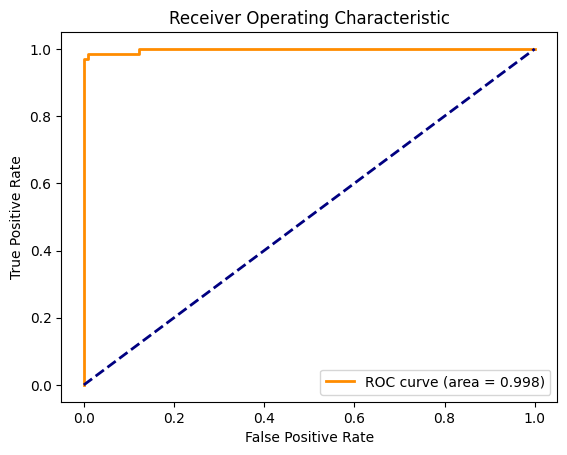

In [219]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = grid_search_svm.decision_function(X_test_ss)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

The SVM model performs very well in a binary classification, with the ROC curve closer to the upper left part (meaning a high true positive rate and a very low false positive rate). The area under the curve is 0.998, very close to 1, which means an excellent model that correctly classifies the classes.

# Analysis of results

## Permutation feature importance

Feature: radius_mean, Importance: 0.0053
Feature: texture_mean, Importance: 0.0018
Feature: perimeter_mean, Importance: 0.0058
Feature: area_mean, Importance: 0.0058
Feature: smoothness_mean, Importance: 0.0006
Feature: compactness_mean, Importance: -0.0018
Feature: concavity_mean, Importance: 0.0099
Feature: concave points_mean, Importance: 0.0105
Feature: symmetry_mean, Importance: -0.0018
Feature: fractal_dimension_mean, Importance: -0.0000
Feature: radius_se, Importance: 0.0070
Feature: texture_se, Importance: 0.0117
Feature: perimeter_se, Importance: 0.0076
Feature: area_se, Importance: 0.0064
Feature: smoothness_se, Importance: -0.0000
Feature: compactness_se, Importance: -0.0012
Feature: concavity_se, Importance: -0.0029
Feature: concave points_se, Importance: 0.0012
Feature: symmetry_se, Importance: 0.0018
Feature: fractal_dimension_se, Importance: -0.0029
Feature: radius_worst, Importance: 0.0088
Feature: texture_worst, Importance: 0.0187
Feature: perimeter_worst, Importance: 

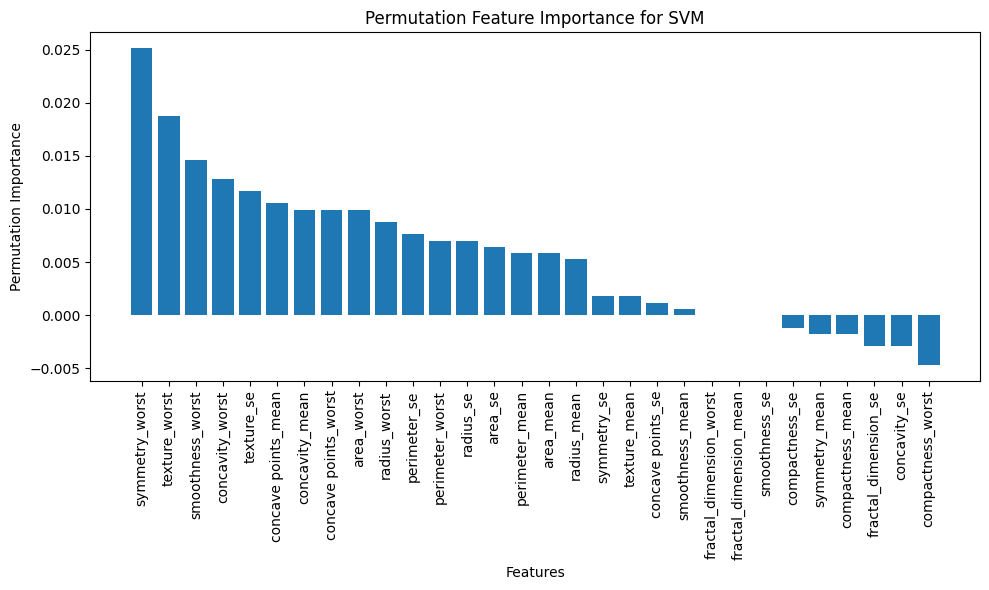

In [220]:
from sklearn.inspection import permutation_importance
import numpy as np

# Best SVM model with GridSearchCV
best_svm = grid_search_svm.best_estimator_

# Calculates the importance of features using test data
result = permutation_importance(best_svm, X_test_ss, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get Feature Importances
importances = result.importances_mean

# Print the importance of each feature
feature_names = X_test.columns  # features names
for i, importance in enumerate(importances):
    print(f"Feature: {feature_names[i]}, Importance: {importance:.4f}")

# bar plot
sorted_indices = np.argsort(importances)[::-1]  # descending order
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Permutation Feature Importance for SVM")
plt.tight_layout()
plt.show()

- X-axis: features ordered according to their importance, from left (most important) to right (least important). \
- Y-axis:  calculated importance value, which represents how much worse the evaluation metric (in this case the F1 score) gets when feature values are randomly shuffled. The higher the bar, the greater the impact of that feature on model performance. For example, if a feature has a very high bar, it means that mixing its values significantly reduces the accuracy of the model. If a bar is zero or negative, it means that mixing that feature does not worsen (or slightly improves) the performance of the model.

The most relevant features for the model are symmetry_worst and texture_worst. In the following, a quick statistical analysis on the top 5 features.

Top 5 important features:
symmetry_worst
texture_worst
smoothness_worst
concavity_worst
texture_se

Statistical description of the top 5 features:
       symmetry_worst  texture_worst  smoothness_worst  concavity_worst  \
count      171.000000     171.000000        171.000000       171.000000   
mean         0.287619      25.110058          0.132846         0.268167   
std          0.056191       6.200122          0.020473         0.203840   
min          0.165200      14.820000          0.084840         0.000000   
25%          0.245850      20.360000          0.119900         0.105850   
50%          0.283400      25.090000          0.133500         0.221000   
75%          0.316550      29.015000          0.143100         0.379000   
max          0.516600      45.410000          0.200600         1.170000   

       texture_se      Target  
count  171.000000  171.000000  
mean     1.215635    0.374269  
std      0.540532    0.485355  
min      0.362100    0.000000  
25%      0.847250

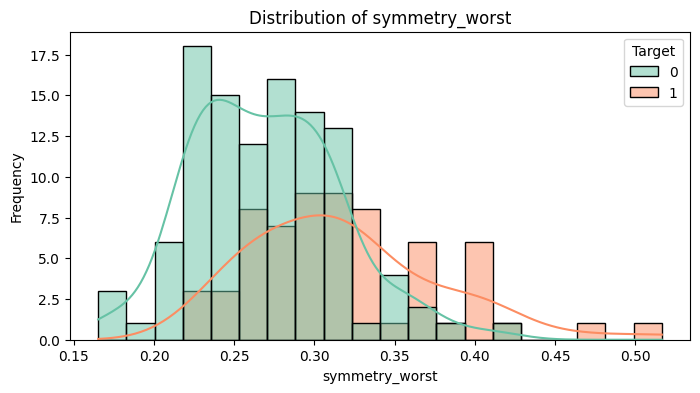

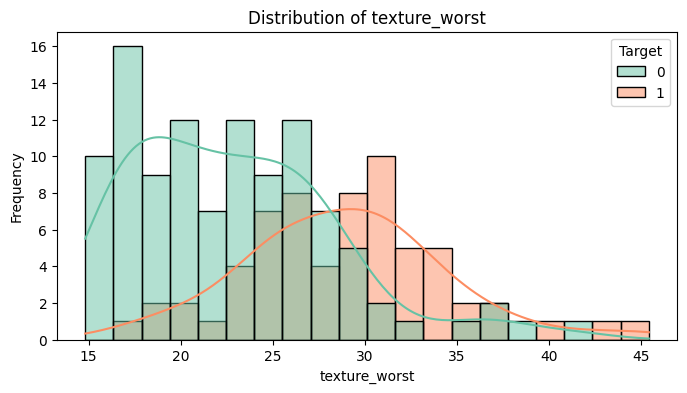

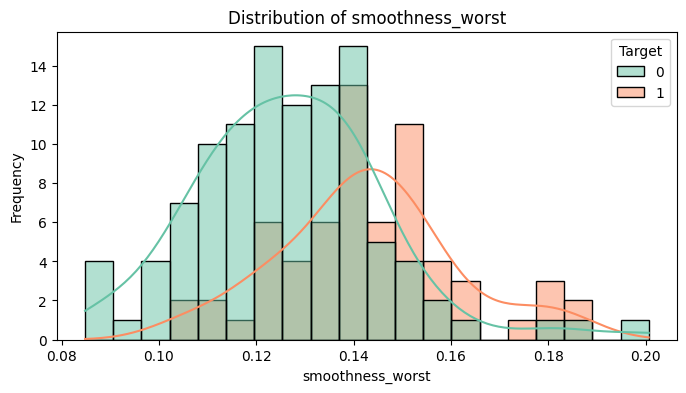

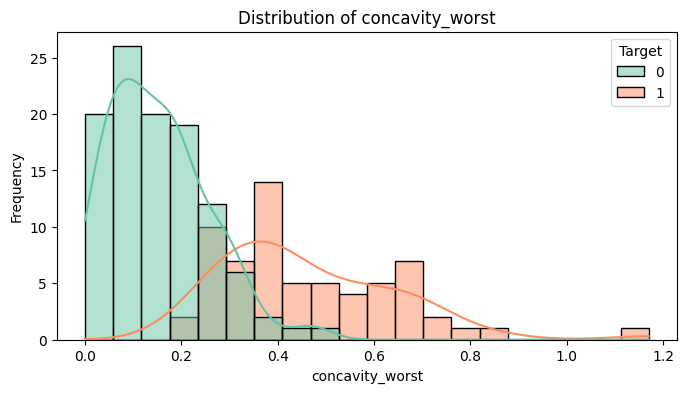

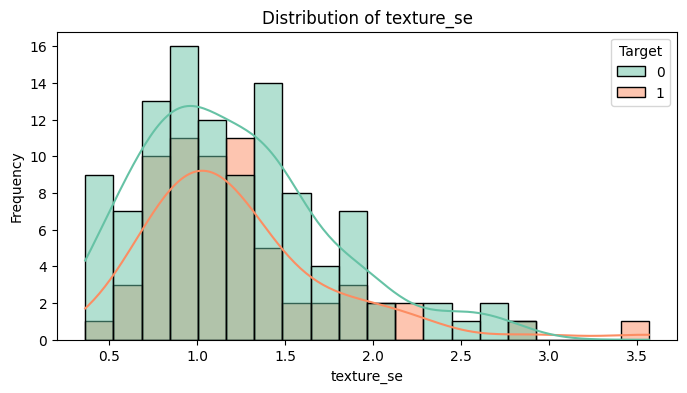


T-test for symmetry_worst:
T-statistic: -5.5738, P-value: 1.8696e-07

T-test for texture_worst:
T-statistic: -7.0766, P-value: 7.5496e-11

T-test for smoothness_worst:
T-statistic: -5.4987, P-value: 1.7750e-07

T-test for concavity_worst:
T-statistic: -12.5671, P-value: 3.1665e-21

T-test for texture_se:
T-statistic: -0.3590, P-value: 7.2022e-01


In [221]:
from scipy.stats import ttest_ind

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
top_features = [feature_names[i] for i in sorted_indices[:5]]

# Print the top 5 important features
print("Top 5 important features:")
for feature in top_features:
    print(feature)

# Create a subset of the dataset with the selected features
X_top_features = X_test[top_features]

# Add the target column to the dataset for analysis
df_analysis = pd.DataFrame(X_top_features)
df_analysis['Target'] = y_test.values

# Statistical description
print("\nStatistical description of the top 5 features:")
print(df_analysis.describe())

# Visualize distributions
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_analysis, x=feature, hue='Target', kde=True, palette='Set2', bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Statistical comparison between classes (T-test for 2 classes)
for feature in top_features:
    benign_values = df_analysis[df_analysis['Target'] == 0][feature]
    malignant_values = df_analysis[df_analysis['Target'] == 1][feature]

    t_stat, p_value = ttest_ind(benign_values, malignant_values, equal_var=False)
    print(f"\nT-test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

- T-test: a large absolute value indicates a strong difference in means between benign and malignant classes. \
- p-value: if < 0.05 suggests this difference is statistically significant.

- symmetry_worst: highly relevant feature for classification \
- texture_worst: highly relevant feature for classification \
- smoothness_worst: highly relevant feature for classification \
- concavity_worst: one of the most important features for classification \
- texture_se: is not a significant feature for classification \


## Relationship between top features and target variable

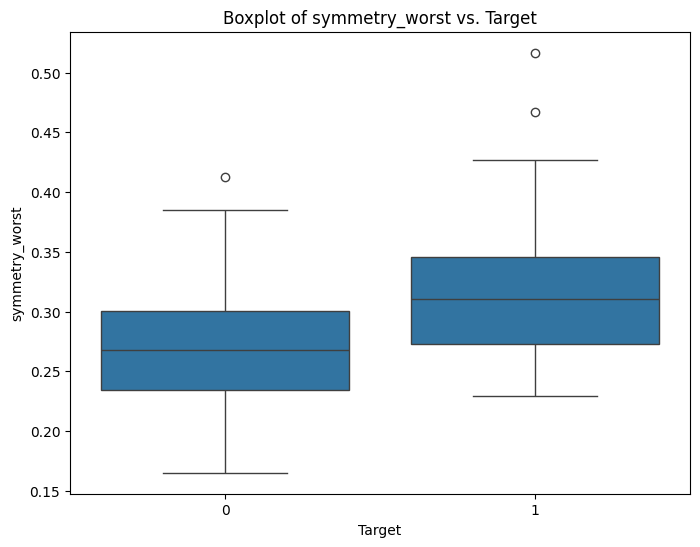

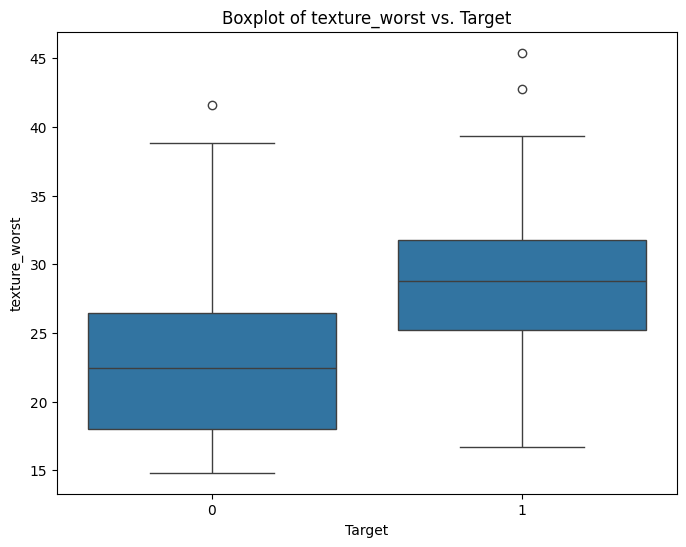

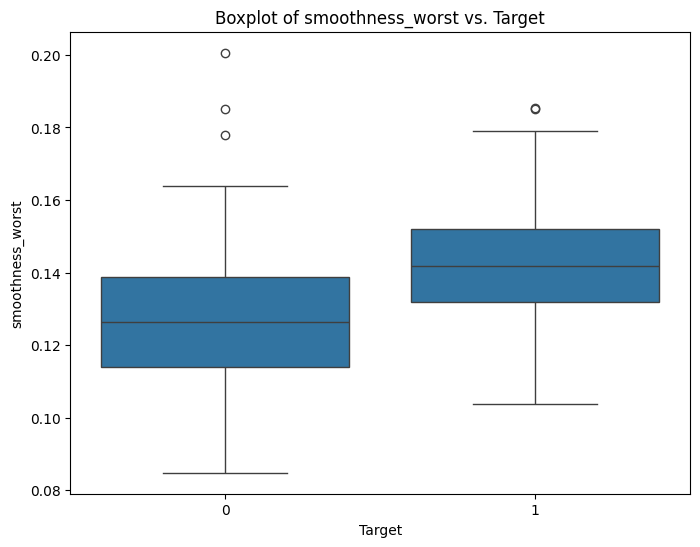

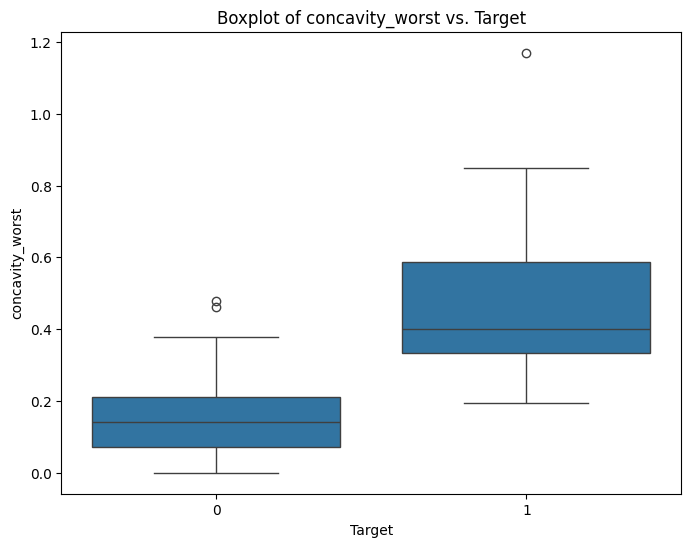

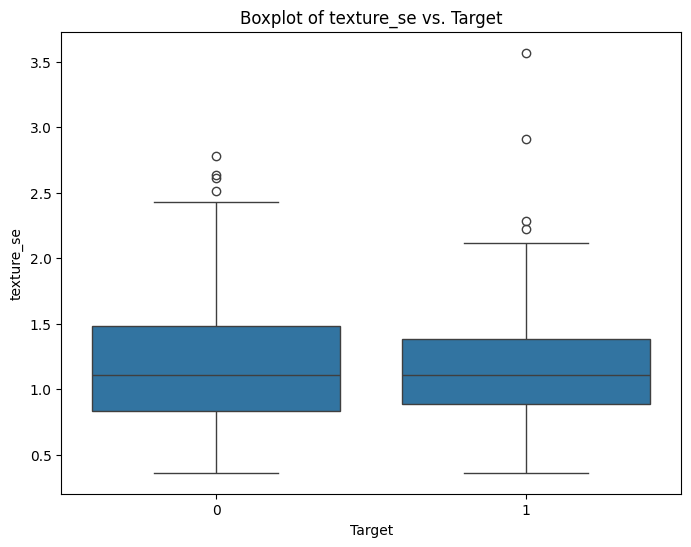

In [222]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=feature, data=df_analysis)
    plt.title(f'Boxplot of {feature} vs. Target')
    plt.show()

It can be seen that for each relevant feature, the malignant tumour has the high mean value for that feature. This is not the case for texture_se, which is not relevant.

## Correlation analysis among top features

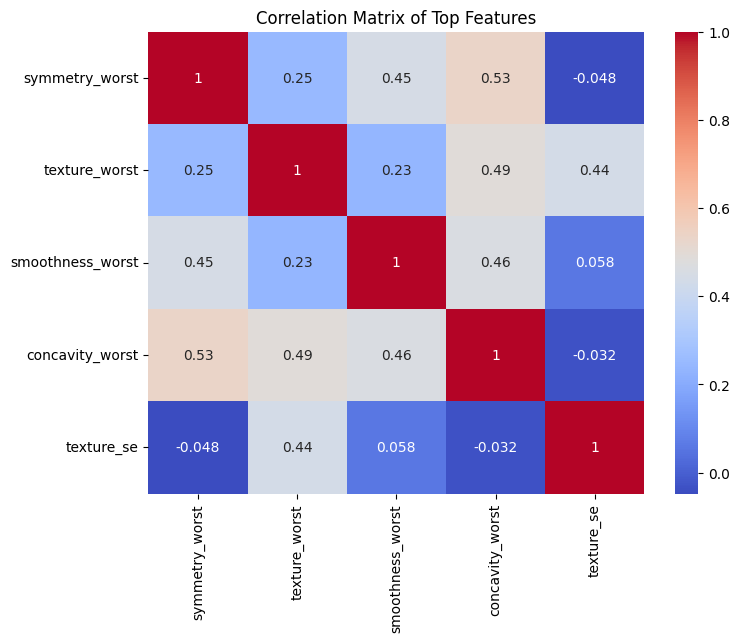

In [223]:
correlation_matrix = df_analysis[top_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Features')
plt.show()

From the correlation matrix of the top features, the most correlated (<0.5) are symmetry_worst and concavity_worst, which are relevant features for classification. However, the correlation is not very strong.

## Partial Dependency Plot (PDP)

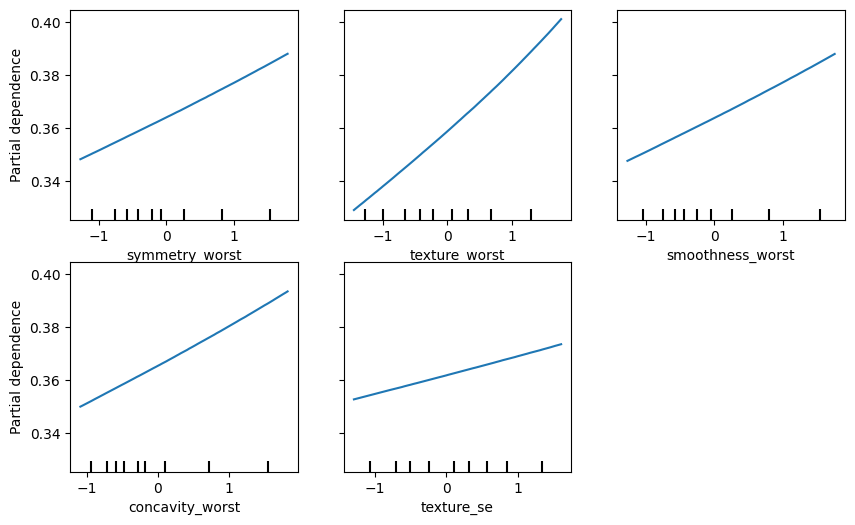

In [224]:
from sklearn.inspection import PartialDependenceDisplay

top_feature_indices = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    estimator=grid_search_svm.best_estimator_,
    X=X_test_ss,  #Use the scaled data here
    features=top_feature_indices,  # Indices of the top 5 features
    feature_names=top_features,
    kind='average',
    ax=ax
)

plt.show()

X-axis (feature): Shows the effect of feature variation (in this case, the scaled values from -1 to 1) on the model's prediction. \
Y-axis (probability): Shows how the predicted probability for class 1 changes as the feature varies. \

- If the curve goes up, it means that as the feature increases, the probability that the tumour is malignant increases.
- If the curve goes down, it means that as the feature increases, the probability that the tumour is malignant decreases. \

As expected, all features (except texture_se) increase the likelihood of a malignant tumour.

# Conclusions

In this notebook, a dataset of breast tumours has been analysed. The aim is to be able to predict whether a tumour is benign or malignant on the basis of some feature measurements. \

The first part is the data exploration and analysis. Then several machine learning models were evaluated. The best performance was achieved with the SVM model, where 0 benign tumours were classified as malignant and 3 malignant tumours were classified as benign, with an F1 score (class 0 - benign) of 98.6% and an F1 score (class 1 - malignant) of 97.6%, with an overall test accuracy of 97.6%. \

The main features contributing to the classification of the malignant tumour are: \
- symmetry_worst: Represents the worst value for tumor surface symmetry, indicating how irregular or asymmetrical the shape is.
- texture_worst: Represents the worst value for tumor texture, reflecting the variation in pixel intensity within the tumor region.
- smoothness_worst: Represents the worst value for tumor smoothness, showing how much the surface deviates from being spherical.
- concavity_worst: Represents the worst value for tumor concavity, indicating areas of inward curvature on the tumor surface.


# Further improvements

- Wait for the XGBoost bug to be fixed and add this model to the analysis.
- Try changing the scaling method to improve model performance.
- Improve the SVM model by removing some irrelevant features.
- Combine different models in an ensemble learning algorithm to achieve better recall.
- Implement some other feature explanation such as LIME or SHAP methods.
- Build a deep learning model.